In [34]:
from pathlib import Path
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def plot_histo(bin_edges, counts):
    """Uses matplotlib to graph a histogram based on output from numpy np.histogram()

    Args:
        bin_edges (_type_): _description_
        counts (_type_): _description_
    """
    plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge')
    plt.yscale('log')
    # Add titles and labels
    plt.title('Histogram with Counts (Logarithmic Scale)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

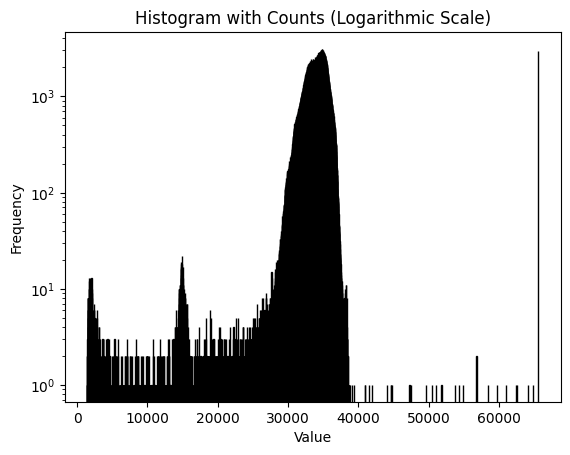

In [37]:
image = Path("C:/Users/allis/Documents/2024-2025_Local/Akamai Internship/pipeline-testing/test-data-05-12/raw/d1013.fits")
bin_width = 10

with fits.open(image) as hdu:
    header = hdu[0].header
    data = hdu[0].data
    
    # number of pixels in image
    xsize = header['NAXIS1']
    # number of overscan columns
    cover = header['COVER']
    # Remove overscan portion
    data = data[0:,0:xsize-cover]
    
    # Calculate number of histogram bins, based on range of data
    minval = np.min(data)
    maxval = np.max(data)
    num_bins = int((maxval-minval)/bin_width) + 1
    
    # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
    counts, bin_edges = np.histogram(data, bins=num_bins, ) #range=(minval, minval + num_bins * bin_width)
    
    # Plot histogram using matplotlib
    plot_histo(bin_edges, counts)

    # print(num_bins)
    # print(counts.tolist()[:30])
    # print(np.sum(counts))
    
    # # Display the bins and their values
    # for i, bin_values in enumerate(bins):
    #     print(f"Bin {i} (Range {bin_edges[i]} - {bin_edges[i+1]}): {bin_values}")
    
    # plt.hist(data.tolist(), bins=num_bins, edgecolor='black', range=(minval, minval + num_bins * bin_width))

In [ ]:
# x = []
# for index, val in np.ndenumerate(data):
#     if val < 1050:
#         print(index, val)
# print(x)

Fill the histogram bins with the actual pixel values that fall within their range

In [ ]:
# Create a list to store the values in each bin
bins = [[] for _ in range(num_bins)]

# Assign each value to the corresponding bin
for row in data:
    for value in row:
        bin_index = int(np.floor((value - minval) / bin_width))
        bins[bin_index].append(value)

Create a histogram of all the values in just one bin

In [ ]:
bin_to_analyze = int(num_bins/2)
def analyze_bin(bin_index):
    # Create the histogram -- counts = frequency within each bin, bin_edges = values at bin boundaries
    subcounts, subbin_edges = np.histogram(bins[bin_index], bins=10, ) #range=(minval, minval + num_bins * bin_width)

    # Plot histogram using matplotlib
    # plot_histo(subbin_edges, subcounts)
    
    mean = np.mean(bins[bin_index])
    std = np.std(bins[bin_index])
    return [mean, std]

analyze_bin(bin_to_analyze)

[33490.399666249476, 2.8527424050294674]

Find the mean and standard deviation for all bins

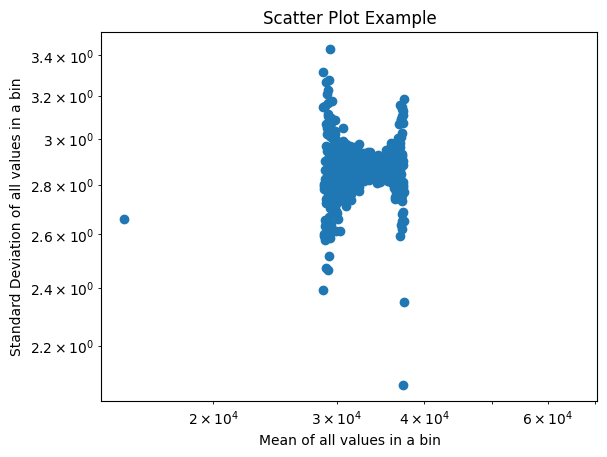

In [ ]:
means = []
stds = []
for bin_index in range(len(bins)):
    if len(bins[bin_index]) > 20:
        mean, std = analyze_bin(bin_index)
        means.append(mean)
        stds.append(std)

# Plot the scatter plot
plt.scatter(means, stds)
plt.xscale('log')
plt.yscale('log')

# Add titles and labels
plt.title('Scatter Plot Example')
plt.xlabel('Mean of all values in a bin')
plt.ylabel('Standard Deviation of all values in a bin')

# Show the plot
plt.show()